In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [41]:
iris = pd.read_csv('1.csv')
iris.drop('Форма края', axis=1, inplace=True)
iris.drop('form2', axis=1, inplace=True)
iris.drop('form3', axis=1, inplace=True)
iris.drop('steb', axis=1, inplace=True)
iris.drop('zhil', axis=1, inplace=True)

In [42]:
iris.head()
#Первые 5 строк набора данных Iris

,"Длина листовой пластинки, мм","Ширина листовой пластинки, мм","Длина черешка, мм",Type
0,44,71,120,viola
1,42,73,128,viola
2,42,71,109,viola
3,36,59,78,viola
4,41,76,45,viola


In [43]:
iris.shape
#В этом наборе данных 150 примеров и 6 колонок

(153, 4)

In [44]:
iris.info()
# Для каждего примера есть все значения фитч

<class 'pandas.core.frame.DataFrame'>
Int64Index: 153 entries, 0 to 152
Data columns (total 4 columns):
Длина листовой пластинки, мм     153 non-null int64
Ширина листовой пластинки, мм    153 non-null int64
Длина черешка, мм                153 non-null int64
Type                             153 non-null object
dtypes: int64(3), object(1)
memory usage: 6.0+ KB


In [47]:
iris[iris['Type'] == 'viola'].describe()
# Средние значения для определенного класса

,"Длина листовой пластинки, мм","Ширина листовой пластинки, мм","Длина черешка, мм"
count,25.000000,25.000000,25.000000
mean,37.280000,61.080000,107.200000
std,9.829886,14.256344,23.421856
min,19.000000,33.000000,45.000000
25%,32.000000,49.000000,95.000000
50%,36.000000,60.000000,109.000000
75%,43.000000,71.000000,120.000000
max,61.000000,84.000000,152.000000


/usr/local/lib/python3.5/site-packages/matplotlib/__init__.py:892: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


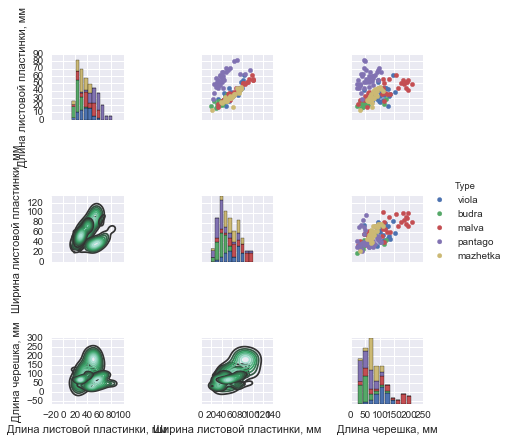

In [53]:
import seaborn as sns
p = sns.PairGrid(data=iris.ix[:, 0:], hue="Type", diag_sharey=False, size=2)
p.map_upper(plt.scatter)
p.map_lower(sns.kdeplot)
p.map_diag(plt.hist)
p = p.add_legend()

# Библиотека поверх matplotlib позволяет в пару строчек отобразить наши данных во всех размерностях
# В качестве цвета исопльзуется класс

У нас есть ширина и высота для Чашелистика (Sepal) и Лепестка (Petal).  
Если мы умножим ширины на высоты мы получим площадь в кв. см.   
Поможет ли нам это?

In [ ]:
iris['Sepal_Area'] = iris['SepalLengthCm'] * iris['SepalWidthCm']
iris['Petal_Area'] = iris['PetalLengthCm'] * iris['PetalWidthCm']

In [ ]:
sns.lmplot('Sepal_Area', 'Petal_Area', hue='Species', fit_reg=False, data=iris, size=5)

As we can see in the scatterplot of sepal and petal areas, the 'virginica' species tends to
have the largest petal area and the 'setosa' species tends to have the lowest petal area. All 
three species, for the most, part have similar sizes in terms of sepal area. It is clear
that the petal area is the defining characteristic when trying to discern the different species
of iris.

Taking the petal_area as THE defining characteristics a few steps forward, I will test 
whether I can build a predictive model with just one predictor, petal_area, and see how 
that compares with a model that uses the original four predictors. 

To set this classification problem up, I will first split the data into training and test sets. 
Next, I will train a model on the training data. Then, I will see how well that trained
model does on the test data. Finally, I will present accuracy scores to show how my simpler
model does against a model that uses all the original predictors.


In [ ]:
#Create a 80/20 split of the data between training and test sets.
from sklearn.cross_validation import train_test_split
iris_train, iris_test = train_test_split(iris, train_size=0.8)

In [ ]:
X_train = iris_train.ix[:, 1:5]
y_train = iris_train.ix[:, 5]
X_test = iris_test.ix[:, 1:5]
y_test = iris_test.ix[:, 5]

![alt text](LogReg_1.png "Title")

![alt text](LogisticRegressionWindowLogisticFitChart6.png "Title")

In [ ]:
#Set up, instantiate and fit model on training set.
from sklearn.linear_model import LogisticRegression
log_mod = LogisticRegression(random_state=1234)
log_mod.fit(X_train, y_train)


In [ ]:
#Predict on X_test model predictors
y_pred = log_mod.predict(X_test)

In [ ]:
from sklearn import metrics
metrics.accuracy_score(y_test, y_pred)

#We get an accuracy of about 96.7% on a simple log model using our original
#predictors. Let's try the same using my created area predictor for petal area.

In [ ]:
area_of_petal_train = iris_train.ix[:, -1]
area_of_petal_test = iris_test.ix[:, -1]

In [ ]:
area_of_petal_train_rs = area_of_petal_train.reshape(-1,1)
petal_area_log_mod = LogisticRegression(random_state=1234)
petal_area_log_mod.fit(area_of_petal_train_rs, y_train)

In [ ]:
area_of_petal_test_rs = area_of_petal_test.reshape(-1,1)
petal_area_pred = petal_area_log_mod.predict(area_of_petal_test_rs)

In [ ]:
metrics.accuracy_score(y_test, petal_area_pred)
#Looks like the single variable model generated an accuracy equal to the more
#complex model with all 4 original predictors. Let's see how these models stack
#up when we use other modeling algorithms like KNN.

In [ ]:
#We begin our examination of K-Nearest Neighbors by importing and instantiating
#the algorithm
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

In [ ]:
#Because we are dealing with a small data set and we have to find the optimal
#value for k, we use GridSearch to find, using 10 fold cross validation, the
#optimal value for k between 1 and 30.
from sklearn.grid_search import GridSearchCV
k_range = list(range(1,31))
param_grid = dict(n_neighbors=k_range)
grid = GridSearchCV(knn, param_grid, cv=10, scoring="accuracy")

In [ ]:
#first we fit the more complex model with all 4 predictors.
grid.fit(X_train, y_train)

In [ ]:
print(grid.best_score_)
print(grid.best_params_)

#It looks like our best prediction came from setting k to 5. This produced a
#increased training model accuracy of 97.5%. An improvement on the complex 
#model we fit with logistic regression.

In [ ]:
#Now we fit a model on the training data using a value of 5 for k.

knn_complex = KNeighborsClassifier(n_neighbors=5)
knn_complex.fit(X_train, y_train)

In [ ]:
knn_complex_preds=knn_complex.predict(X_test)

In [ ]:
metrics.accuracy_score(y_test, knn_complex_preds)

#The complex KNN model with k set to 5, predicts the species in the test set
#with 100% accuracy. Now we try and see if we can replicate this success with
#the simpler model using the area of the petals.

In [ ]:
grid2 = GridSearchCV(knn, param_grid, cv=10, scoring="accuracy")
grid2.fit(area_of_petal_train_rs, y_train)

In [ ]:
print(grid2.best_score_)
print(grid2.best_params_)

#Here we see that our simpler model needed 1 neighbor to achieve a high of 96.7%
#accuracy with the training data. Let's see how it does on the test set.

In [ ]:
knn_simple=KNeighborsClassifier(n_neighbors=1)
knn_simple.fit(area_of_petal_train_rs, y_train)

In [ ]:
knn_simple_preds = knn_simple.predict(area_of_petal_test_rs)

In [ ]:
metrics.accuracy_score(y_test, knn_simple_preds)
#It appears that the KNN loses some accuracy from a single variable in that its
#performance is not as successful in accuracy as the more complex model. 

In this short exercise, we created a couple of new features (petal area and sepal
area) from the product of our original variables. A subsequent visualization of the
new features suggested that petal area on its own could accurately predict the
type of species we were dealing with. To test this, we ran a couple of algorithms,
logistic regression and KNN. The simpler model of Petal Area was tested against a
more complex model featuring the original variables. While the more complex model
returned better accuracy in the KNN model, we still succeeded in doing quite
well with the simpler model. 